In [1]:
#Load the CSV files  - import the Pandas and Matplotlib library with the Pyplot Module and run the cell:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#declare variables that connect to the CSV files in the Resources folder
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read the Ride Data file
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Inspecting the City Data Frame involves the below
#When we inspect data such as the city data frame we must consider:
#Get all the rows that contain null values
#Make sure the driver_count column has an integer data type
#Find out how many data points there are for each type of city

In [6]:
#Use the df.count() to find the names of our columns and the numbers of rows that are not null
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
#make sure that there are no null values
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
#See if the driver_count column has a numerical data type as we plan to perform math calculations on this column
#To get the data types of each column, we use the dtypes on the DataFrame
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
#Check how many data points there are for each type of city using sum()
#We can use unique() on a specific column which will return an array or list, of all the unique values of the column
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#We can use the sum() method on the city_data_df for the type of column where the conditions equal either Urban, Suburban and Rural
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
#Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

36

In [12]:
#Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

18

In [13]:
#Inspect the Ride DataFrame
#Get all the rows that contain null values
#Make sure the fare and ride_id columns are numerical data types
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
#Make sure there are no null values
#Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
#Determin if the fare and ride_id columns are numerical data types so that we can perform math calculations on these columns
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
#The 2 Dataframes have 'city' as a similar column between the 2 dataframes
#Merge the two Dataframes on the city column, then add the city_data_df to the end of the ride_data_df
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#Get the average fare using mean() for each "fare" column for the y-axis
avg_fare = pyber_data_df["fare"].mean()
avg_fare

26.753111578947426

In [18]:
#Get the total number of rides for each type city on the x-axis
city_rides = pyber_data_df["ride_id"].count()
city_rides

2375

In [19]:
#DataFrame 1 - Urban
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
#DataFrame 2 - Suburb
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()                                   

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [21]:
#DataFrame 3 - Rural
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [22]:
#Get the total number of Urban rides - DataFrame
ride_type_urban = pyber_data_df.loc[(pyber_data_df["type"] == "Urban") & pyber_data_df["ride_id"]]
ride_type_urban

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
...,...,...,...,...,...,...
1616,Simpsonburgh,2019-03-03 08:45:54,7.63,4176780124147,21,Urban
1617,West Angela,2019-05-07 01:03:12,12.35,2050512349119,48,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban


In [23]:
#Get the total number value of urban rides 
ride_type_urban_count = len(ride_type_urban["ride_id"].unique())
ride_type_urban_count = ride_type_urban["ride_id"].count()
ride_type_urban_count

829

In [24]:
#Get the total number of Suburban rides (the woopwoop) - DataFrame
ride_type_suburban = pyber_data_df.loc[(pyber_data_df["type"] == "Suburban") & pyber_data_df["ride_id"]]
ride_type_suburban

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban
...,...,...,...,...,...,...
2238,South Teresa,2019-03-05 19:18:37,32.29,4981692995989,21,Suburban
2241,Sotoville,2019-03-13 16:06:10,14.36,8629533024103,10,Suburban
2242,West Hannah,2019-01-21 19:54:08,41.95,16507766547,12,Suburban
2243,South Teresa,2019-03-09 09:54:33,25.08,8136313906059,21,Suburban


In [25]:
ride_type_suburban_count = len(ride_type_suburban["ride_id"].unique())
ride_type_suburban_count = ride_type_suburban["ride_id"].count()
ride_type_suburban_count

312

In [26]:
#Get the total number of Suburban rides (the woopwoop) - DataFrame
ride_type_rural = pyber_data_df.loc[(pyber_data_df["type"] == "Rural") & pyber_data_df["ride_id"]]
ride_type_rural

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
...,...,...,...,...,...,...
2363,Michaelberg,2019-03-13 14:40:18,37.72,8842606115175,6,Rural
2364,Lake Jamie,2019-02-25 23:46:02,28.65,5815763839331,4,Rural
2365,Lake Jamie,2019-04-19 04:32:47,16.29,3518682119233,4,Rural
2368,Lake Jamie,2019-04-29 01:58:44,54.22,2489264790267,4,Rural


In [27]:
ride_type_rural_count = len(ride_type_rural["ride_id"].unique())
ride_type_rural_count = ride_type_rural["ride_id"].count()
ride_type_rural_count

61

In [28]:
ride_type_rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural


In [29]:
#Get the number of rides for each city type
#To get the number of rides per city & city type, create a series where the index 
#is the same name of the city, and the column is the number of rides for that city
#Groupby() can be used to group large amounts of data when we need to compute math operations on these groups
#Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [30]:
#Create the suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [31]:
#Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [32]:
#Get the average fair for each city type
#we chain the mean() method to get the averages of the fare column
#Get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [33]:
#get the average for each city in the suburban and rural areas
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [34]:
#get the average for each city in the suburban and rural areas
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [35]:
#Get the average number of drivers for each city in the urban, suburban and rural cities
#Get the mean of the driver count
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [36]:
#get the average number of drivers for each city in the suburban areas
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [37]:
#get the average number of drivers for each city in the rural areas
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [38]:
#TASK 1: Create a scatter plot for each type of city where the conditions are met:
#TASK 1: x-axis is the # of rides/each city, y-axis is the avg. fare/each city, the size of each mrkr is the avg # of drivers/city

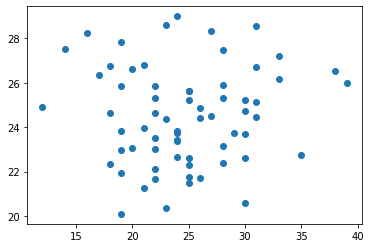

In [39]:
#Build the scatter plots for urban cities
plt.scatter(urban_ride_count,urban_avg_fare)
plt.show()

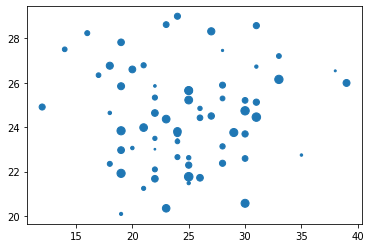

In [40]:
#To change the size of the markers, we add the s= parameter to the scatter() function
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=urban_driver_count)
plt.show()

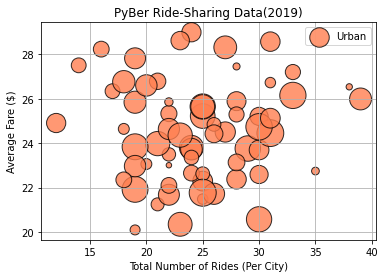

In [41]:
#To change the marker color we use color= 
#to add a title on the x-axis, y-axis and a legend we use plt.title(), plt.ylabel(), plt.xlabel() and plt.legend()
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8,label="Urban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()
plt.show()
#The diameter is based on the average number of drivers in each city and its respective titles 

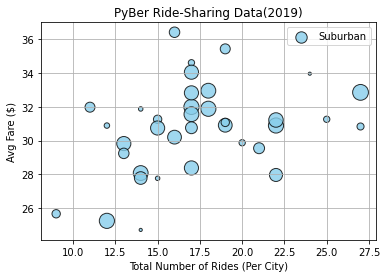

In [42]:
#Create the suburban bubble chart
#Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,c="skyblue",
           edgecolor="black", linewidths=1,
           alpha=0.8,label="Suburban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Avg Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()
plt.show()

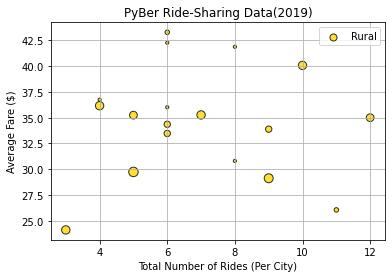

In [43]:
#Create the rural cities bubble chart
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,c="gold",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Rural")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()
plt.show()

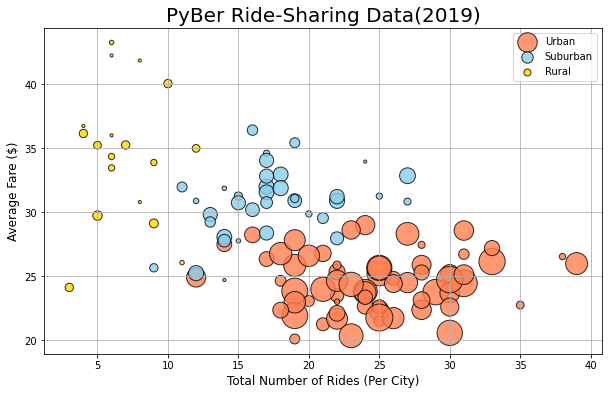

In [44]:
#Add the 3 charts into 1 chart
#Combine the scatter charts for each type of city
#Add the title, labels for the axes, a legend and a grid for all 3 charts and increase the font size of the axes labels from 12 to 20 
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,c="coral",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Urban")
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,c="Skyblue",
           edgecolor="black",linewidths=1,
        alpha=0.8,label="Suburban")
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,c="gold",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Rural")

#Incorporate other graph properties
plt.title("PyBer Ride-Sharing Data(2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)

#Add the legend
plt.legend()

#show the plot
plt.show()
#We did not have to change the x limit because plotting all the data on one chart formats the x-axis automatically
#We can change the y-limit from 0 to 40 but it may crowd the bubbles in the middle of the chart making it difficult to see the differences in the data

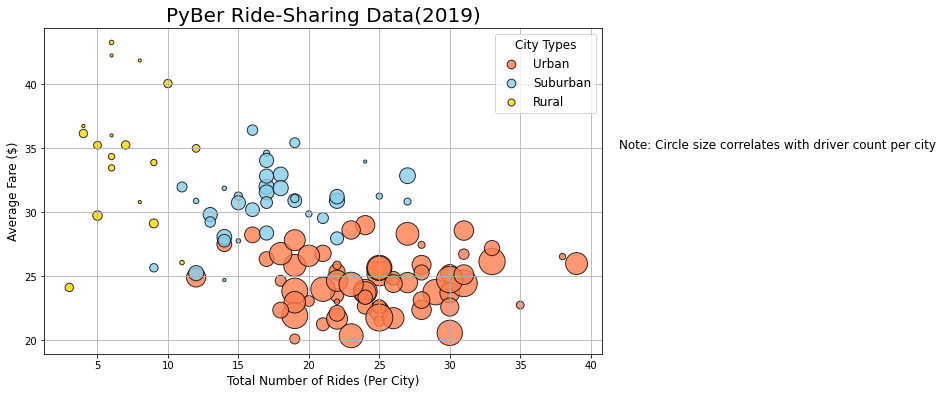

In [45]:
#We can declare the variable for the legend to fix it's sizes
#We will use legendHandles[]._sizes to set the font size of the marker in the legend to a fixed size
#inside the brackets we are adding the list element for the number of markers in the legend
#New code to fix the legend - the plt.legend() was replaced 
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count,c="coral",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Urban")
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,c="Skyblue",
           edgecolor="black",linewidths=1,
        alpha=0.8,label="Suburban")
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count,c="gold",
           edgecolor="black",linewidths=1,
           alpha=0.8,label="Rural")

#Incorporate other graph properties
plt.title("PyBer Ride-Sharing Data(2019)",fontsize=20)
plt.ylabel("Average Fare ($)",fontsize=12)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.grid(True)

#Recreate the legend
lgnd = plt.legend(fontsize="12",mode="Expanded",
                 scatterpoints=1, loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._size = [75]
lgnd.get_title().set_fontsize(12)

#Note: Circle size correlates with driver count per city
#incorporate a text lablel about circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city",fontsize="12")

#Save the figure to the folder
plt.savefig("analysis/Fig1.png")

#show the plot - plt.show() is our last step to show the chart
plt.show()


In [46]:
#3 ways to calculate the summary statistics: 
#1: Pandas describe() function
#2: Pandas mean(), median() and mode() methods 
#3: NumPy mean() and median() functions and the SciPy stats mode() function on a Series

In [47]:
#Pandas describe() function gets a high-level summary of the statistics on a Dataframe or Series
#the output will show the count, mean, standard deviation, minimum value, percentiles and maximum value from a DataFrame column that has numeric values
#Use the Pandas describe() function on the urban, suburban, and rural dataframes
#Get the summary statistics - urban
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [48]:
#Pandas describe() summary - suburban
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [49]:
#Pandas describe() summary - rural
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [50]:
#Pandas describe() to get the ride count for each city type - urban
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [51]:
#Pandas describe() to get the ride count for each city type - suburban
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [52]:
#Pandas describe() to get the ride count for each city type - rural
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [53]:
#Pandas mean(), median() and mode() methods
#if we want to get only the mean without the complete summary we use the mean() method
#Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

#the output is the average ride count for each city type rounded to 2 decimal places 
#this shows us that if we compare the average number of rides between each city type, we can notice that the 
#average number of rides in the rural cities is about 3.5 and 2.5 times lower than urban and suburban cities. 

(24.62, 17.36, 6.94)

In [54]:
#Get the median of a DataFrame or Series, we use the Pandas median()
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.mean(),2)

(24.0, 17.0, 6.94)

In [55]:
#Get the mode of a DataFrame or series using the Pandas mode() method - urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [56]:
#Get the mode of a DataFrame or series using the Pandas mode() method - suburban cities
suburban_ride_count.mode()

0    17
dtype: int64

In [57]:
#NumPy mean() and median() funcitons and SciPy mode() function
#We use this when using the Python interpreter or VS code environment instead of the Jupyter Notebook enviornment
#No matter which, you will need to import the NumPy and SciPy statistics modules 
#Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [58]:
#calculate the measures of central tendency (mean, median and mode)
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

#Code breakdown: 
#1) The mean and median values that are returned are the same as describe() function and the mean()/median() methods
#2)With SciPy statistics, the mode result that's returned is the mode that appears the most frequently
#3) ModeResult returned the two attributes: mode is 22, count is the number of times it occured in the dataset (7)
#Unlike the Pandas mode() method, the sts.mode() method will return the number of times the mode appears in the data set

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [59]:
#How many times does 17 appear in the suburban cities? 
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [60]:
#What is the mode and frequency for rural cities ride count?
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [61]:
#There are various choices to find the mean, median and mode but it all depends on whether you're working with Pandas, NumPy 
#or statistics modules

In [62]:
#Calculate the summary statistics for the average fares for each city type
#Get the value from the "fare" column in each city type DataFrame
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [63]:
#We can calculate the mean, median and mode for urban_fares
#To get the mean and median we'll use the NumPy mean and median functions
#To get the mode we'll use the SciPy statistics mode function, sts.mode()  
#Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [64]:
#Get the value from the "fare" column for the suburban fare DataFrame
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [65]:
#Calculate the measures of central tendency for the average fare of the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")


The mean fare price for suburban trips is $30.970128.
The median fare price for suburban trips is $30.750000.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [66]:
#Get the value from the "fare" column for the rural fare DataFrame
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [67]:
#Calculate the measure of central tendency for the average fare of the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")


The mean fare price for rural trips is $34.623440.
The median fare price for rural trips is $37.050000.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [68]:
#Summary statistics for the number of drivers by city type
#Create a Series for each city type based on the driver_count column in each city type DataFrame
#Get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [69]:
#Get the driver count data for suburban cities
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [70]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [71]:
#Caclulate the measures of central tendency for the urban, suburban and rural driver count Series using Numpy and Scipy stats modules
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")

print(" ")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")

The mean driver count for urban cities is 36.67815384615385.
The median driver count for urban cities is 37.0.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
 
The mean driver count for suburban cities is 13.712.
The median driver count for suburban cities is 16.0.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [72]:
#Create Box and Whisker Plots
#Box-whisker plots show a lot of information about distribution in a small amount of space, especially outliers
#Box-Whisker plots for Ride Count Data
#Creating Box-Whisker plots requires the use of ax.boxplot()

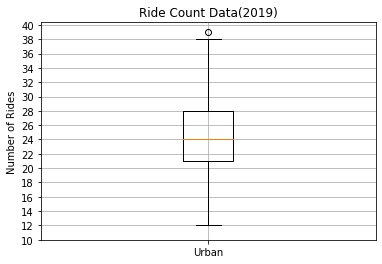

In [73]:
#Create a box whisker plot for urban_ride_count - creating the plot for urban cities ride count
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_ride_count, labels= x_labels)
#Add the title, y- axis label and grid
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0)) #this will help determine where the min and max lie/any outliers
ax.grid()
plt.show()

#The below shows that there is at least one outlier, which is close to 40 (max data point,39)
#It shows the min. is 12, the median is 24 (50th percentile)
#It shows the standard dev. is about 5 because the upper and lower boundaries represent the upper and lower quartiles

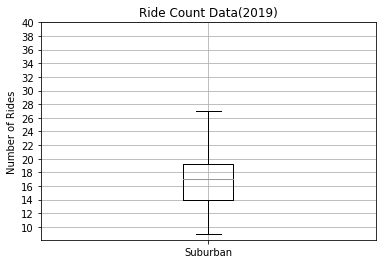

In [74]:
#Summary statistics using box-whisker plot, suburban cities
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_ride_count,labels= x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

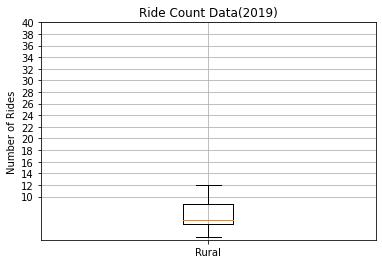

In [75]:
#Summary statistics using box-whisker plot, rural cities
x_labels = ["Rural"]
fix,ax = plt.subplots()
ax.boxplot(rural_ride_count,labels = x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Count Data(2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

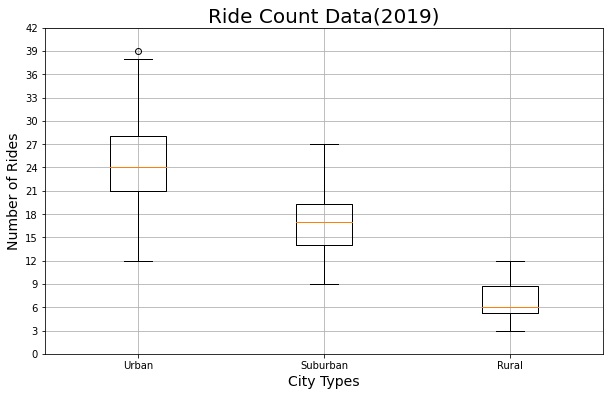

In [76]:
#Showing all the city type box-whisker plots on one chart, we need to modify the boxplot() function
#We will need to add other features. 
#We will also increase the size of the chart and the font of the title and axes labels
#Add all ride count box-whisker plots on the same graph:
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count,rural_ride_count]
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data(2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data,labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
#Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

#The below shows that there is 1 outlier in the urban ride count data
#The average number of rides in the rural citis is about 4x and 3.5x lower per city 
#Recall that the urban_ride_count is a Series with the index of the city 
#urban_ride_count also shows the number of rides per city

In [77]:
#We can get all the "True" values where the urban_ride_count equals 39
#Filter the urban_ride_count for all "true" values and get the city name from the index
#Get the city that matches the 39 outlier
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the higest rider count.")

West Angela has the higest rider count.


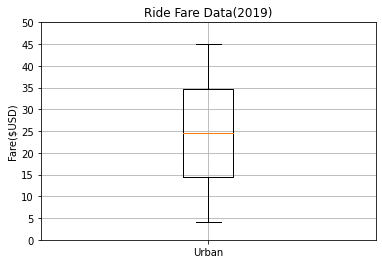

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [78]:
#Create a box-whisker plots for the ride fare data 
#we will use urban_fares sereies
#Create a box-whisker for the urban fare data
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_fares,labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data(2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

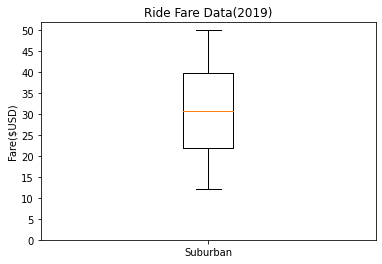

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [79]:
#Create a box-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_fares,labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data(2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid
plt.show()
print("Summary Statistics")
suburban_fares.describe()

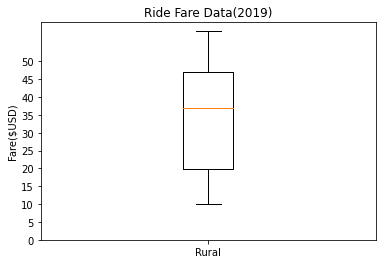

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [80]:
#Create a box-whisker plot for the rural fare data 
x_labels = ["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_fares,labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Ride Fare Data(2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid
plt.show()
print("Summary Statistics")
rural_fares.describe()

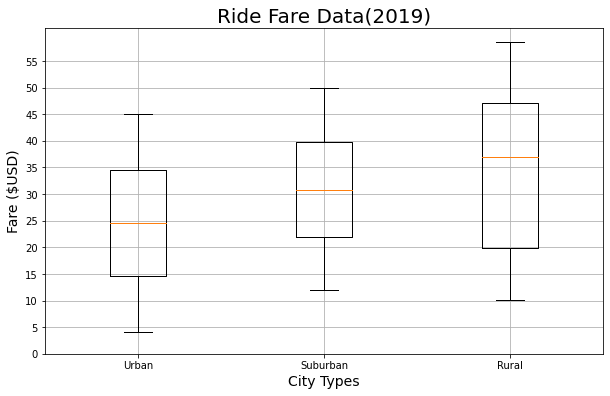

In [81]:
#Showing all the city type box-whisker plots on one chart for all ride fares
x_labels = ["Urban","Suburban","Rural"]
fare_count_data = [urban_fares, suburban_fares, rural_fares]
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Fare Data(2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.boxplot(fare_count_data,labels=x_labels)
ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid()

#Save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

#Finding: From the below, we see there are no outliers
#However, the avg fare for rides in the rural cities is $11 and $ more per ride than the 
#urban and suburban cities
#By looking at the number of riders for each city we can get a sense of the overall revenue.

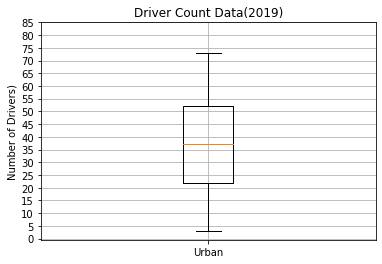

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [82]:
#Create a box-whisker for the urban driver count data with summary statistics
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
#Add the title, y-axis label and grid.
ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

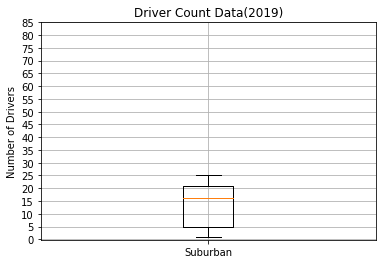

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [83]:
#Create a box-whisker plot for the suburban_drivers 
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

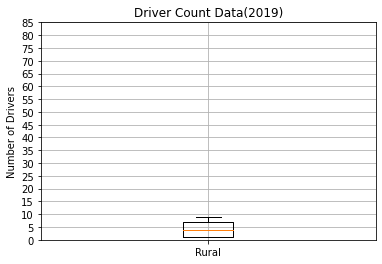

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [84]:
x_labels = ["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
#Add the title, y-axis label and grid
ax.set_title('Driver Count Data(2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

In [85]:
#Findings for Driver Count Data shows the average number of drivers in rural cities is 4-9 times 
#less per city than in urban and suburban cities
#By looking at the driver count and fare count we can see get a sense of the overall revenue

In [86]:
#We can use pie charts to represent the overall fares for each type of city
#Step 1: Get the total fares for each city type
#Step 2: Get the total for all the fares for all city types
#Step 3: Calculate the percentage of the total fares for each city type

In [87]:
#To get the total fares for each city type, we will create a Series where the index is: 
#Type of city on the pyber_data_df DataFrame and the column is the sum of the fares for city type
#We can use the groupby() function and add the column in parenthese
#To calculate the percentage of total fares for each city type based on total fares we will: 
#TASK1: Use the groupby() function on the pyber_data_df DataFrame and group by the type of city column so the type of city is the index
#TASK2: Apply the sum() method on the fare column to get the Series with the total number of fares for each city type
#TASK3: Divide the total fares for each city type by the total of all the fares and multiply by 100

In [88]:
#Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [89]:
#Get the total fares by using the sum() method on the fare column of the pyber_data_df DataFrame
#Get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares
#in USD($)

63538.64

In [90]:
#Calculate the percentage of total fares for each city type by dividing the sum_fares_by_type Series by the total_fares Series and multiplying by 100
#Calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [91]:
#Perform the calculation
types_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

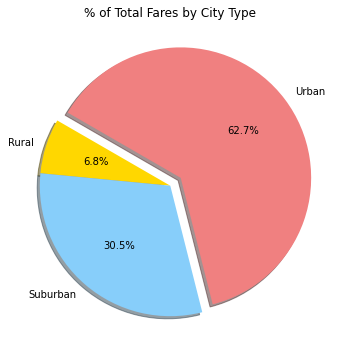

In [92]:
#Creating the pie chart using the MATLAB approach (simple) plt.pie() function
#To create a pie chart with the plt.pie() function we need an array that contains the values and labels we are plotting
#Each wedge represents a city and its % of total fares
#labels will be the city type
#we can use type_percents for the value for each wedge and create an array for the labels
#Build the percentage of fares by city type pie chart
#Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14
#Save Figure
plt.savefig("analysis/Fig5.png")
#Show Figure
plt.show()

#If we wanted to change the fontsize there is no parameter for it in pie charts like scatterplots
#We will have to change the default parameters by using rcParams which accesses the run and configure setting for the Matplotlib parameters
#To change the default parameters we need to import the matplotlib library which IS NOT the sames as the matplotlib.pyplot imported in the plt() function


In [93]:
#Show the percentage of total rides for each type of city, with each wedge representing the % of total rides for each city type
#STEP1: Get the total number of rides for each city type
#STEP2: Get the total rides for all the city types
#STEP3: Calculate the percentage of the total rides for each city type

In [94]:
#To get the toal rides for each type of city we need to create a Series of data where the index is the type of city and the column for the Series is the number of the rides for the type of city
#Similar to how we created the Series for the percentage of fares for each city type

In [95]:
#TASK1: Calculate the percentage of rides for each city type based on all the rides 
#pyber_data_df.groupby(["type"])
#TASK2: Apply the count() function on the ride_id to get the Series with the total number of rides per city type
#pyber_data_df.groupby(["type"]).count()["ride_id"]
#TASK3: Get the number of total rides using the count() function on the ride_id column on the pyber_data_df 
#pyber_data_df["ride_id"].count()
#TASK4: Divide the total number of rides for each city type by the total rides for all the cities and divide by 100

In [96]:
#Calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

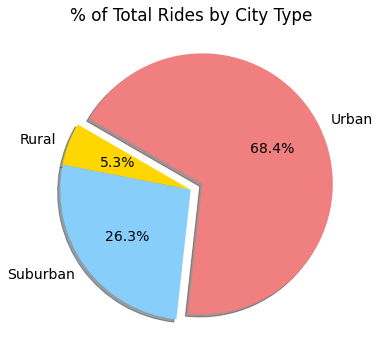

In [97]:
#Create a pie chart for the % rides by city type, where each wedge reps. a city and its % of the total rides
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [98]:
#Create a chart that shows th % of total drivers for each city type where each wedge will be the % of total drivers
#STEP1: Get the total # of drivers for each city type
#STEP2: Get the total drivers for all the city types 
#STEP3: Caclulate the % of the total drivers for each city type
#Calculate the driver_percents like the type_percents and ride_percents
#1: Use the groupby() function on the city_data_df and group by "type" of city column
#2: Apply the sum() funciton on the driver_count column to get the Series with the total number of drivers for each city type
#3: Get the total # of drivers using the sum() function on the driver_count column on the city_data_df DataFrame
#4: Divide the Series for the total number of drivers for each city type by the number of total drivers and multiply by 100

In [105]:
#Calculate the % of drivers for each city type
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

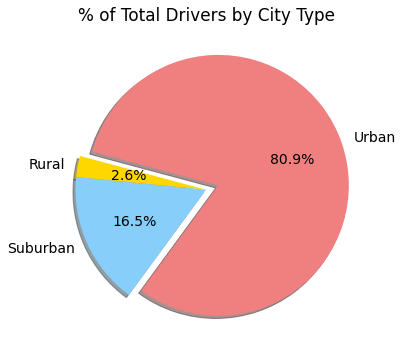

In [108]:
#Create the pie chart for the % of drivers by city type where each slice reps a city and its % of total drivers
#Build percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
       labels=("Rural","Suburban","Urban"),
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
#Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14
#Save Figure
plt.savefig("analysis/Fig7.png")
#Show Figure
plt.show()